In [16]:
import csv
import requests
import os
import pandas as pd

url = 'https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv'
response = requests.get(url)
path = '/Users/jenskohl/group_12/Prototypes'
with open(os.path.join(path,'downloaded_data.csv'), 'w') as f:
    writer = csv.writer(f)
    for line in response.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))

filename='downloaded_data.csv'
df = pd.read_csv(filename) 
df =  df[df["year"] >= 1970]


iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
70         AFG  Afghanistan  1970                20.588                 0.228   
71         AFG  Afghanistan  1971               -17.683                -0.236   
72         AFG  Afghanistan  1972               -47.407                -0.521   
73         AFG  Afghanistan  1973                64.789                 0.374   
74         AFG  Afghanistan  1974                -1.709                -0.016   
...        ...          ...   ...                   ...                   ...   
17465      ZWE     Zimbabwe  2015               -25.013               -10.847   
17466      ZWE     Zimbabwe  2016               -37.694               -12.257   
17467      ZWE     Zimbabwe  2017                 8.375                 1.697   
17468      ZWE     Zimbabwe  2018                22.555                 4.952   
17469      ZWE     Zimbabwe  2019               -35.015                -9.422   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
70                     NaN                  NaN                  NaN   
71                     NaN                  NaN                  NaN   
72                     NaN                  NaN                  NaN   
73                     NaN                  NaN                  NaN   
74                     NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
17465                  NaN                  NaN                  NaN   
17466                  NaN                  NaN                  NaN   
17467                  NaN                  NaN                  NaN   
17468                  NaN                  NaN                  NaN   
17469                  NaN                  NaN                  NaN   

       oil_prod_change_twh  energy_cons_change_pct  ...  \
70                     NaN                     NaN  ...   
71                     NaN                     NaN  ...   
72                     NaN                     NaN  ...   
73                     NaN                     NaN  ...   
74                     NaN                     NaN  ...   
...                    ...                     ...  ...   
17465                  NaN                  -0.789  ...   
17466                  NaN                 -14.633  ...   
17467                  NaN                     NaN  ...   
17468                  NaN                     NaN  ...   
17469                  NaN                     NaN  ...   

       solar_elec_per_capita  solar_energy_per_capita           gdp  \
70                       NaN                      NaN  3.271839e+10   
71                       NaN                      NaN  3.263744e+10   
72                       NaN                      NaN  2.728279e+10   
73                       NaN                      NaN  2.806331e+10   
74                       NaN                      NaN  2.959603e+10   
...                      ...                      ...           ...   
17465                  0.579                      NaN  2.503057e+10   
17466                  0.641                      NaN  2.515176e+10   
17467                  0.773                      NaN           NaN   
17468                  0.970                      NaN           NaN   
17469                  0.956                      NaN           NaN   

       wind_share_elec  wind_cons_change_pct  wind_share_energy  \
70                 NaN                   NaN                NaN   
71                 NaN                   NaN                NaN   
72                 NaN                   NaN                NaN   
73                 NaN                   NaN                NaN   
74                 NaN                   NaN                NaN   
...                ...                   ...                ...   
17465              0.0                   NaN                NaN   
17466              0.0                   NaN                NaN   
174

In [119]:
df = df[(df["country"] != "World")& (df["country"] != "North America")]

In [120]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def __gapminder__(year: int):
    if isinstance(year, int):
        copy = df[df["year"]==year]
        x = copy.gdp
        
        relevant_columns = list(filter(lambda x: '_consumption' in x, copy.columns))
        copy['total_consumption'] = copy[relevant_columns].sum(axis = 1, skipna = True)
        
        y = copy.total_consumption
        
        area = copy.population
        
        # Increase the graph size
        plt.figure(dpi=150)
        # Store population as a numpy array: np_pop
        np_pop = np.array(area)
        np_pop2 = np_pop*2
        #Let's delete the annoying legend
        sns.scatterplot(x, y, hue = copy['country'], legend = False, size=np_pop2, sizes=(20,500), alpha = 0.8)
        plt.grid(True)
        plt.xscale('log')
        plt.xlabel('GDP', fontsize = 14)
        plt.ylabel('total_consumption', fontsize = 14)
        plt.title('Year ' + str(year), fontsize = 20)
        plt.xticks([500000000, 1000000000, 10000000000,100000000000, 1000000000000 ],["500m","1b","10b","100b","1tr"])
        plt.text(copy.gdp[copy.country=="China"],copy.total_consumption[copy.country=="China"], "China")
        plt.text(copy.gdp[copy.country=="United States"],copy.total_consumption[copy.country=="United States"], "United States")
        plt.show()
    else:
        raise ValueError("ValueError exception thrown")

    
    
#Develop a sixth method that must be called __gapminder__. This is a reference to the famous 
#[gapminder tools](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1). This method 
#should receive an argument __year__ which must be an __int__. If the received argument is 
#not an int, the method should raise a TypeError. This method should plot a scatter plot 
#where __x__ is __gdp__, __y__ is __total energy consumption__, and the area of each dot is 
#__population__. 

/Users/jenskohl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/jenskohl/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


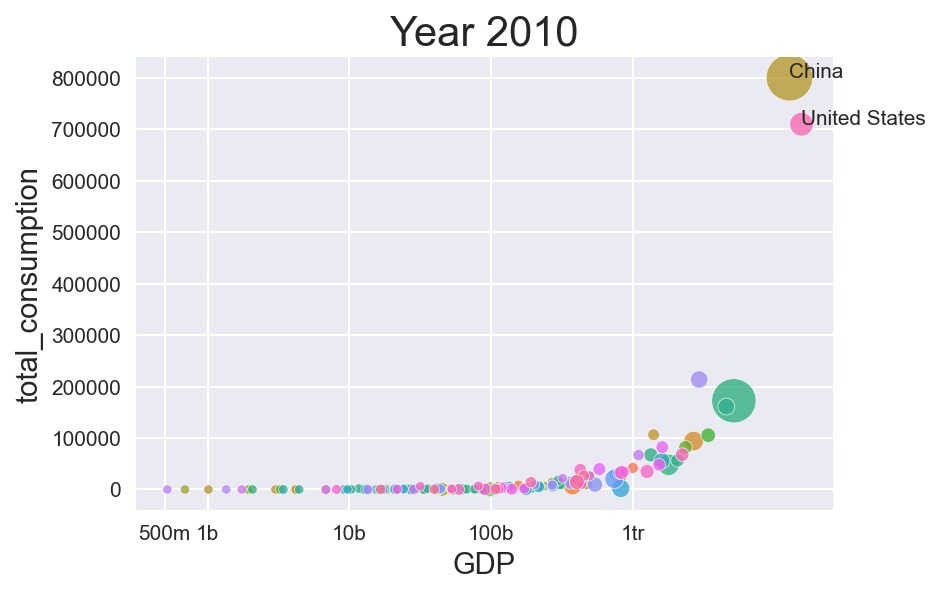

In [121]:
__gapminder__(2010)